C:\Users\Анастасия\AppData\Local\Temp\ipykernel_15136\4004993502.py:28: RuntimeWarning: divide by zero encountered in log10
  spectr_Gauss = 20*log10(np.abs(GaussFFT)/max(GaussFFT))
C:\Users\Анастасия\AppData\Local\Temp\ipykernel_15136\4004993502.py:28: RuntimeWarning: invalid value encountered in multiply
  spectr_Gauss = 20*log10(np.abs(GaussFFT)/max(GaussFFT))


(-60.0, 0.0)

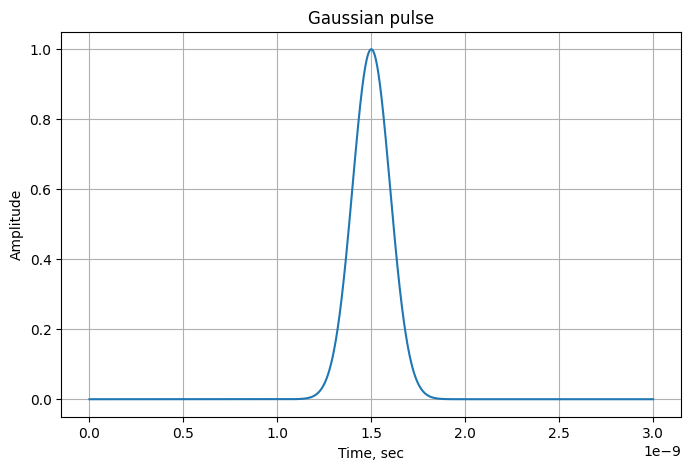

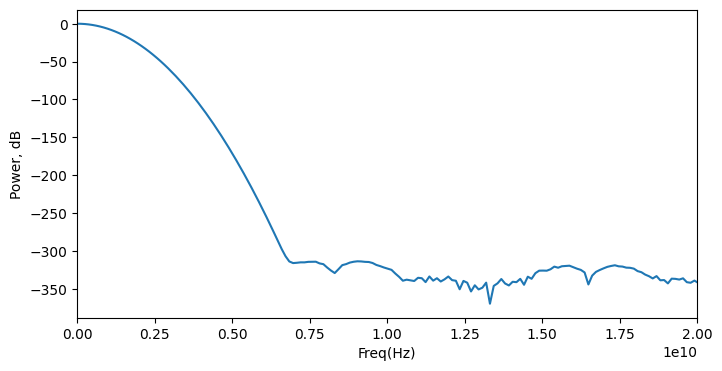

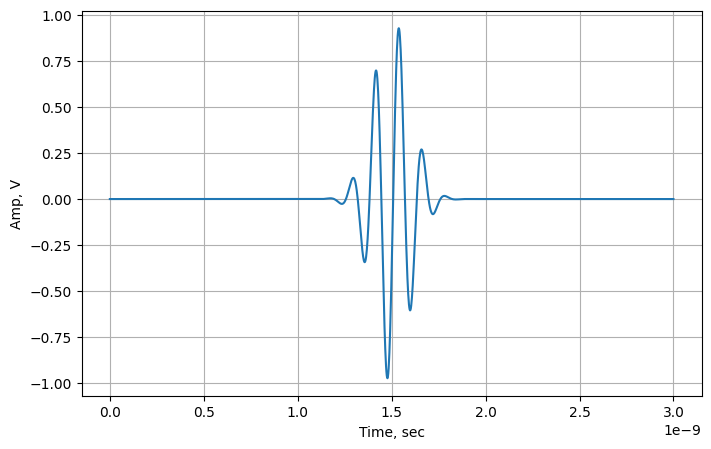

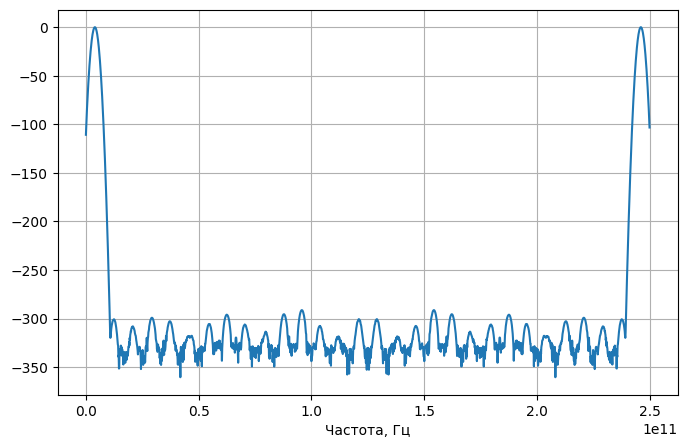

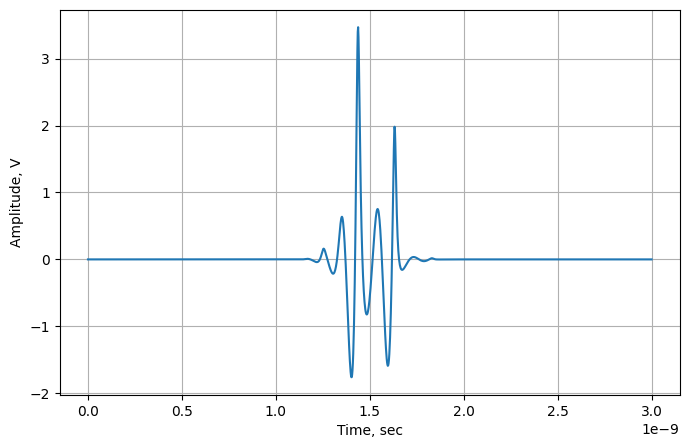

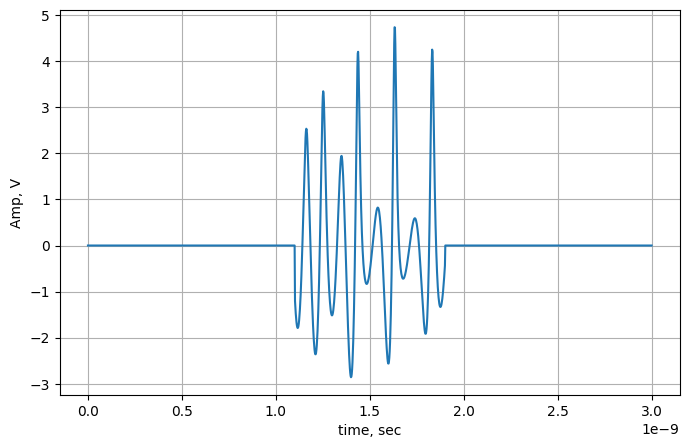

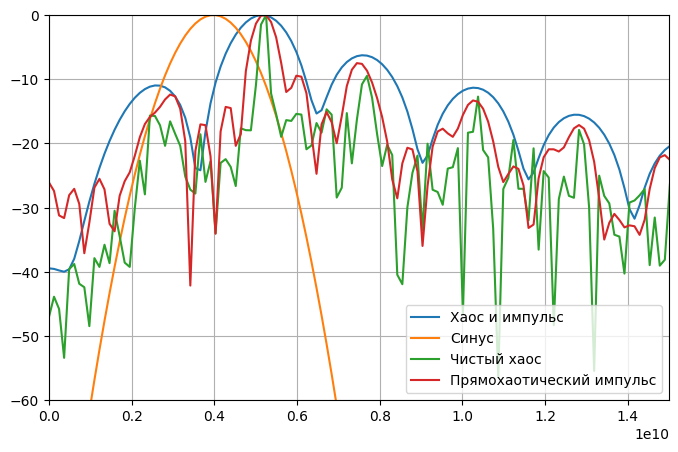

In [3]:
import numpy as np
from numpy import log10
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, ifftshift
from scipy.integrate import odeint
%matplotlib inline

#Константы и массивы
sampling_rate=5*10**11
sampling_time = 1/sampling_rate
N = 2048
time = np.arange (0, 3*10**(-9), sampling_time)
freq=np.linspace(0, sampling_rate/2, 2048)

#Задание гауссовского импульса
Gaussian_pulse = np.e**(-5*10**(19)*(time-1.5*10**(-9))**2)

#График гауссовского импульса
fig0 = plt.figure(figsize=(8, 5))
plt.plot (time, Gaussian_pulse)
plt.grid(True)
plt.xlabel('Time, sec')
plt.ylabel ('Amplitude')
plt.title ('Gaussian pulse')

#Построение спектра гауссовского импульса
GaussFFT = (fft(Gaussian_pulse, N))
spectr_Gauss = 20*log10(np.abs(GaussFFT)/max(GaussFFT))
plt.figure(figsize=(8,4))
plt.plot(freq, spectr_Gauss)
plt.xlabel(u"Freq(Hz)")
plt.ylabel('Power, dB');
plt.subplots_adjust(hspace=0.4)
plt.xlim(0, 2*10**10)

#Периодический сигнал, модулированный СКИ
sin=np.sin(5*10**10*time)
UWB_tip=sin*Gaussian_pulse

#Построение графика периодического сигнала
fig6=plt.figure(figsize=(8, 5))
plt.plot(time, sin*Gaussian_pulse)
plt.grid(True)
plt.xlabel ('Time, sec')
plt.ylabel ('Amp, V')

#Построение спектра UWB-сигнала
FFT_UWB=(fft(UWB_tip, N))
spectr_UWB=20*log10(abs(FFT_UWB)/max(abs((FFT_UWB))))

fig2 = plt.figure(figsize=(8, 5))
plt.plot(freq,spectr_UWB)
plt.grid(True)
plt.xlabel('Частота, Гц')

#Работа генератора хаоса

x0, y0, z0 = 1, 1, 1  # Начальные условия
g, m = 0.17, 1.567  # Параметры системы

# ДУ системы
t=np.linspace (0, 200, 1501)
def Anishenko_Astahov(xyz, t):
    x, y, z, = xyz
    dx_dt = m * x + y - x * z
    dy_dt = -x
    dz_dt = -g * z + g * np.heaviside(x, 0) * x ** 2
    return dx_dt, dy_dt, dz_dt

# Решение ДУ
h = odeint(Anishenko_Astahov, (x0, y0, z0), t)
# Транспонируем матрицу
x, y, z = h.T
t=time
#График реализации хаотического процесса
fig = plt.figure(figsize=(8, 5))
plt.plot(time,x*Gaussian_pulse)
plt.grid(True)
plt.xlabel ('Time, sec')
plt.ylabel ('Amplitude, V')

def rect_wave (x, c, c0): # Прямоугольная волна с начальной точкой c0 и шириной c
     if x>=(c+c0):
          r=0.0
     elif x<c0:
          r=0.0
     else:
          r=1
     return r

straight=np.array([rect_wave(t,0.8*10**(-9),1.1*10**(-9)) for t in time])

#Построение графика прямохаотического импульса
fig5 = plt.figure(figsize=(8, 5))
plt.plot(time,straight*x)
plt.grid ('True');
plt.xlabel ('time, sec')
plt.ylabel ('Amp, V')

#Построение спектров
spectr_Chaos=(abs((fft(x*Gaussian_pulse, N))))
spectr_Chaos_clean = (abs((fft(x, N))))
spectr_Chaos_straight = (abs((fft(x*straight, N))))

#График спектров UWB-сигнала и спектров с хаосом
fig3 = plt.figure(figsize=(8, 5))
plt.plot(freq, 20*np.log10(spectr_Chaos/max(spectr_Chaos)), label='Хаос и импульс')
plt.plot(freq,spectr_UWB, label='Синус')
plt.plot(freq, 20*np.log10(spectr_Chaos_clean/max(spectr_Chaos_clean)), label='Чистый хаос')
plt.plot(freq, 20*np.log10(spectr_Chaos_straight/max(spectr_Chaos_straight)), label='Прямохаотический импульс')
plt.grid(True)
plt.legend()
plt.xlim(0, 1.5*10**(10))
plt.ylim (-60, 0)